In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt    
import seaborn as sns
from scipy import stats

In [5]:
df=pd.read_csv("EastWestAirlines clustering.csv")
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
df.shape

(3999, 12)

In [8]:
df.isnull().values.any()

False

In [9]:
df.corr()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


In [10]:
df.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [11]:
df=df.drop("ID",axis=1)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [12]:
# Normalize data

In [13]:
from sklearn.preprocessing import normalize

In [14]:
df_norm=pd.DataFrame(normalize(df),columns=df.columns)
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


In [15]:
# Dendograms

In [16]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch

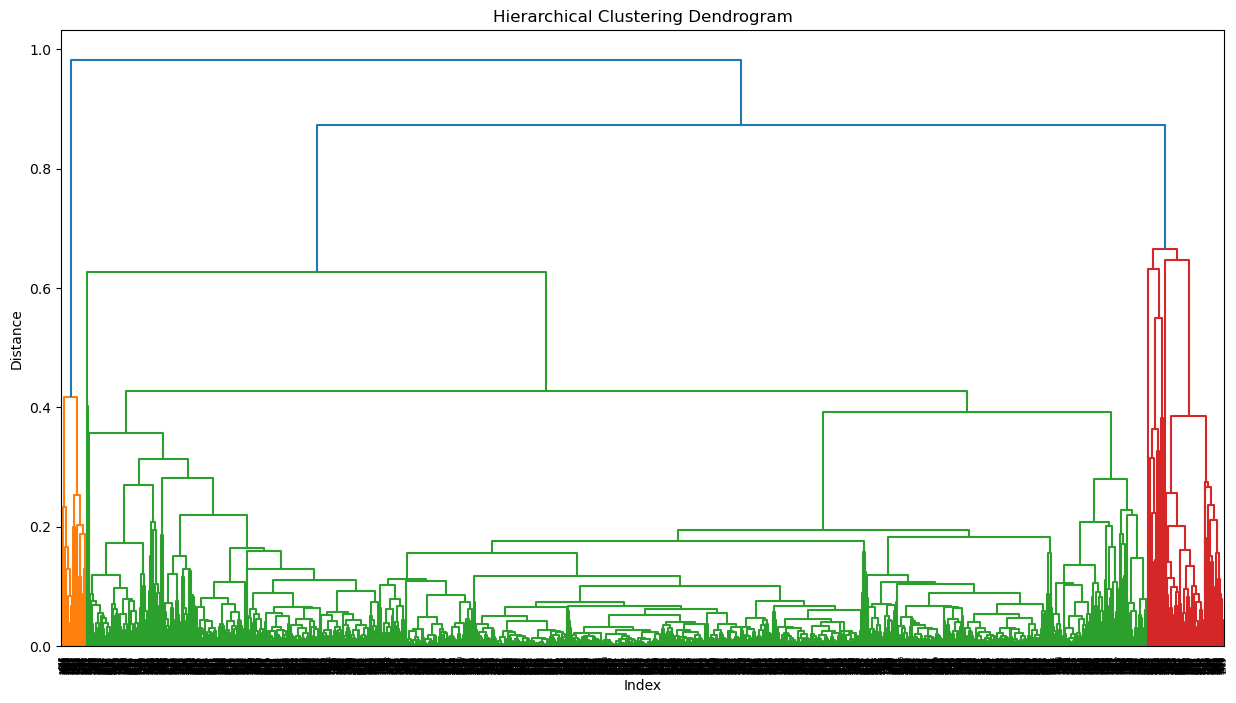

In [17]:
plt.figure(figsize=(15,8))
z = linkage(df_norm, method="average",metric="euclidean")
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()     

In [18]:
from sklearn.cluster import AgglomerativeClustering
h_complete=AgglomerativeClustering(n_clusters=5,linkage='average',affinity='euclidean').fit(df_norm)
cluster_names=pd.Series(h_complete.labels_)
cluster_names
df['clust']=cluster_names
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


In [19]:
df.groupby(df.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
clust,,,,,,,,,,,
0,4931.310345,84.310345,1.189655,1.051724,1.000000,5033.017241,9.224138,793.172414,2.482759,4373.120690,0.637931
1,2364.827586,0.000000,1.000000,1.000000,1.000000,394.413793,2.034483,27.586207,0.137931,4856.402299,0.126437
2,79175.229526,151.085456,2.018351,1.014243,1.008491,16013.185155,11.485620,447.798685,1.343194,4086.349493,0.336894
3,23619.752475,98.074257,3.514851,1.014851,1.089109,48348.420792,18.475248,764.009901,2.118812,4314.381188,1.000000
4,0.000000,0.000000,1.000000,1.000000,1.000000,5491.000000,18.000000,2116.000000,5.000000,3204.000000,1.000000


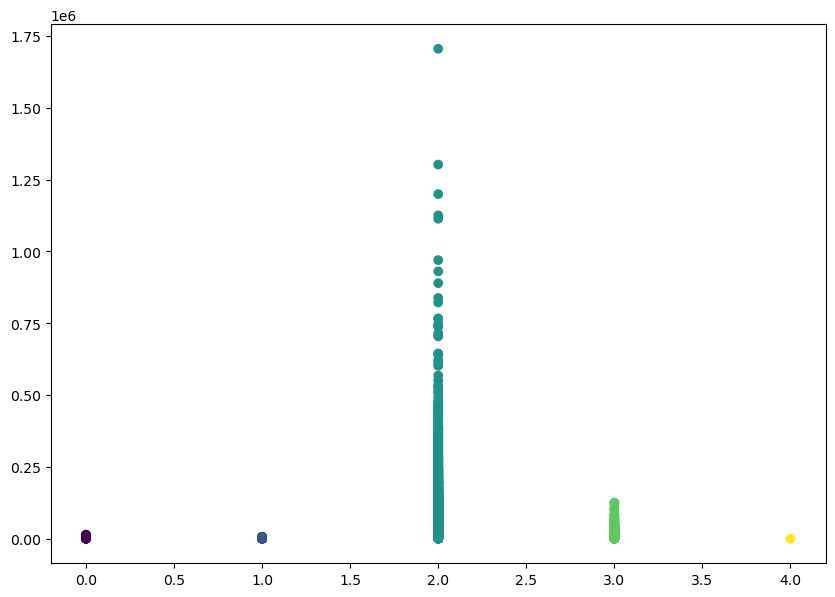

In [20]:
plt.figure(figsize=(10, 7))  
plt.scatter(df['clust'],df['Balance'], c=cluster_names) 

In [21]:
data=df[(df.clust==1)]
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
39,2176,0,1,1,1,0,0,0,0,7847,1,1
51,1300,0,1,1,1,370,1,0,0,6868,0,1
141,6112,0,1,1,1,0,0,0,0,6709,0,1
179,6663,0,1,1,1,1125,7,750,4,7575,1,1
209,6854,0,1,1,1,0,0,0,0,7467,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3680,570,0,1,1,1,180,4,0,0,785,0,1
3768,400,0,1,1,1,160,1,0,0,3460,0,1
3770,2000,0,1,1,1,0,0,0,0,3188,0,1
3876,1000,0,1,1,1,0,0,0,0,1597,0,1


In [22]:
data=df[(df.clust==0)]
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
91,2000,0,1,1,1,2000,4,2000,4,6809,0,0
183,8933,0,2,1,1,8860,14,0,0,7533,1,0
198,8669,0,1,3,1,11397,16,0,0,7486,1,0
234,11449,0,2,1,1,9057,13,0,0,7397,1,0
241,2075,0,2,1,1,5002,14,0,0,7374,1,0
301,7061,0,1,1,1,7100,12,0,0,7218,0,0
392,11189,0,1,2,1,9044,20,0,0,8296,1,0
442,14528,0,1,1,1,6000,7,3000,6,8289,0,0
490,2701,0,1,1,1,5000,10,0,0,8002,1,0
496,2318,0,2,1,1,8747,14,0,0,7945,1,0


In [23]:
data=df[(df.clust==3)]
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
15,28495,0,4,1,1,49442,15,0,0,6912,1,3
41,10470,0,4,1,1,38094,26,0,0,7840,1,3
79,38896,0,5,1,1,76988,16,556,1,7771,1,3
80,4340,0,1,1,1,32685,5,0,0,7733,1,3
85,35418,0,5,1,1,58557,18,900,3,6813,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3837,8150,0,1,2,1,14135,41,500,2,1676,1,3
3881,32424,0,4,1,1,39635,16,0,0,1584,1,3
3883,126167,0,5,1,1,190160,15,0,0,1612,1,3
3888,771,0,1,1,1,13160,4,0,0,1601,1,3


In [24]:
data=df[(df.clust==2)]
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [26]:
df_subset=pd.DataFrame(scaler.fit_transform(df))
df_subset

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,-0.00069
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,-0.00069
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,-0.00069
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,-0.00069
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,-0.00069
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918,-0.00069
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918,-0.00069
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918,-0.00069
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919,-0.00069


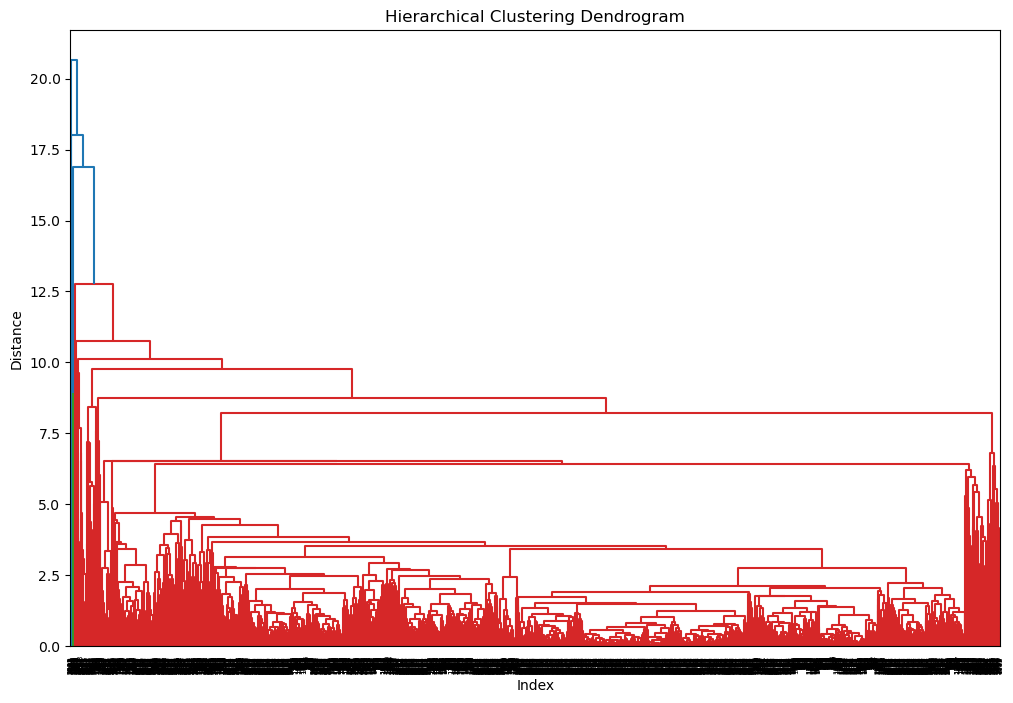

In [27]:
z=linkage(df_subset,method="average",metric="euclidean")
plt.figure(figsize=(12,8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

In [28]:
h_complete=AgglomerativeClustering(n_clusters=5,linkage='average',affinity='euclidean').fit(df_subset)
cluster_names=pd.Series(h_complete.labels_)
cluster_names
df['clust']=cluster_names
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [29]:
df.groupby(df.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
clust,,,,,,,,,,,
0,1.319995e+05,347.000000,2.500000,1.00000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
1,7.277478e+04,142.416792,2.054299,1.01458,1.000754,16804.879588,11.473102,437.345148,1.315737,4116.775013,0.368778
2,1.704838e+06,0.000000,1.000000,1.00000,1.000000,17108.000000,32.000000,4823.000000,23.000000,7283.000000,1.000000
3,1.380614e+05,78.800000,3.466667,1.00000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
4,5.298860e+05,7210.000000,1.000000,1.00000,1.000000,23866.000000,26.000000,7741.000000,15.000000,8296.000000,1.000000


In [30]:
data=df[(df.clust==0)]
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
2015,53232,888,4,1,1,80696,65,22100,45,3831,1,0
3235,287033,0,1,1,1,26161,58,12873,53,2272,1,0
3583,160114,500,1,1,1,71954,86,30817,53,1373,1,0
3594,27619,0,4,1,1,83726,68,14050,46,1325,1,0


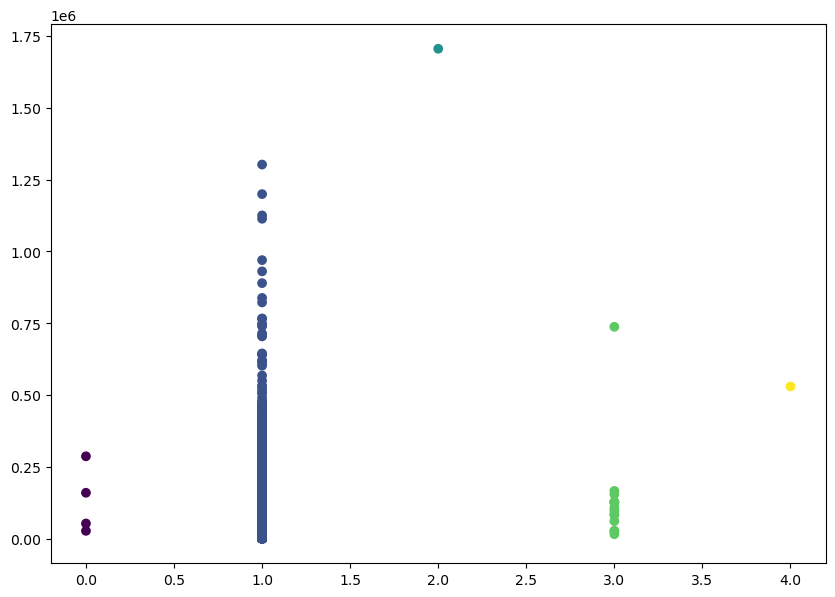

In [31]:
plt.figure(figsize=(10, 7))  
plt.scatter(df['clust'],df['Balance'], c=cluster_names) 

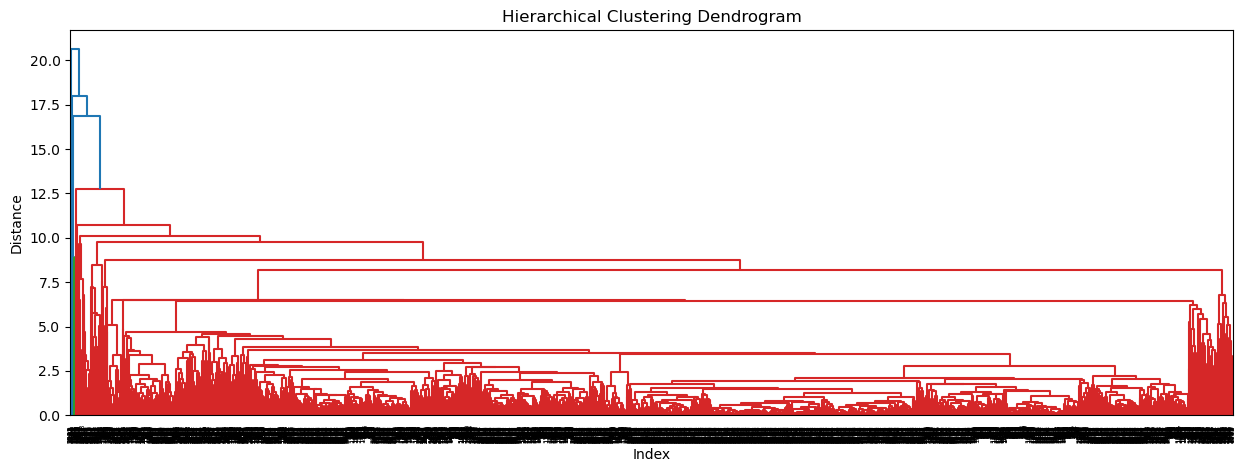

In [32]:
z=linkage(df_subset,method='average',metric='euclidean')
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

In [33]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='single',affinity = "euclidean").fit(df_subset) 
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
df['clust']=cluster_labels  
df  

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


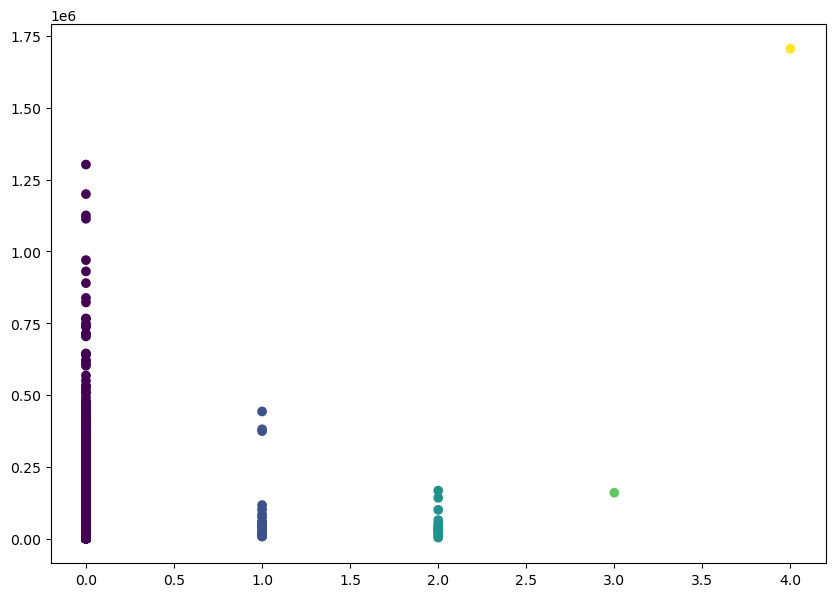

In [34]:
plt.figure(figsize=(10, 7))  
plt.scatter(df['clust'],df['Balance'], c=cluster_labels) 

In [35]:
## DB Scan

In [36]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [37]:
values=df.values
values

array([[28143,     0,     1, ...,  7000,     0,     0],
       [19244,     0,     1, ...,  6968,     0,     0],
       [41354,     0,     1, ...,  7034,     0,     0],
       ...,
       [73597,     0,     3, ...,  1402,     1,     0],
       [54899,     0,     1, ...,  1401,     0,     0],
       [ 3016,     0,     1, ...,  1398,     0,     0]], dtype=int64)

In [38]:
stscaler=StandardScaler().fit(values)
scale=stscaler.transform(values)
scale

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01, -9.71489791e-02],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01, -9.71489791e-02],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01, -9.71489791e-02],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -9.71489791e-02],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01, -9.71489791e-02],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01, -9.71489791e-02]])

In [39]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.82, min_samples=6)
dbscan.fit(scale)

DBSCAN(eps=0.82, min_samples=6)

In [40]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [41]:
cl=pd.DataFrame(dbscan.labels_,columns=['Cluster'])

In [42]:
df1=pd.concat([df,cl],axis=1)
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [43]:
df1['Cluster'].value_counts()

 0    2222
 1     956
-1     801
 2      13
 3       7
Name: Cluster, dtype: int64

Text(0.5, 1.0, 'Clusters using DBScan')

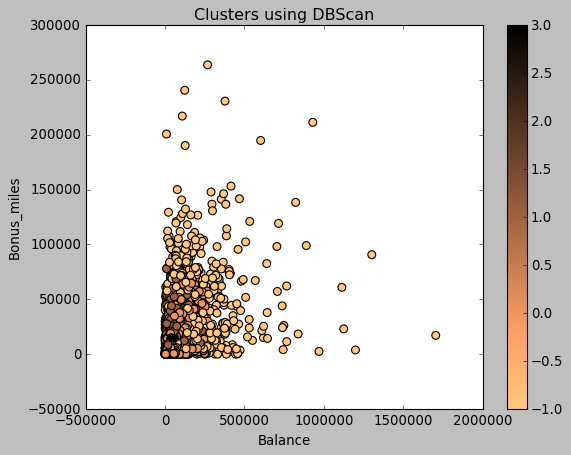

In [44]:
plt.style.use('classic')   
df1.plot(x="Balance",y ="Bonus_miles",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan')      

In [45]:
## K means

In [47]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=14,random_state=0)
kmeans.fit(df)

KMeans(n_clusters=14, random_state=0)

In [ ]:
kmeans.inertia_

In [ ]:
wcss = []
for i in range(1, 19):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

In [ ]:
plt.plot(range(1, 19), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()